In [1]:
# Import libraries
import pandas as pd # For uploading data
import matplotlib.pyplot as plt # For plotting graphs

In [3]:
# # Uploading data file in google colab
# from google.colab import files
# uploaded = files.upload()

# Load Dataset
df = pd.read_csv('mobile_price_range_data.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# Handling Null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
# Handling Duplicates
print(df.duplicated().sum())

0


In [7]:
df.info()                           # getting info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
# Segregating the data into x and y
x = df.drop('price_range',axis = 1) # Independent Variable or Input
print(x.head(5))
y = df['price_range'] # Dependent Variable or output
print(y[:5])

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  
0        0 

In [12]:
# splitting dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train) # to avoid bias, fitting the whole dataset to same range of values
x_test = sc.transform(x_test)
print(type(x_train))
print(x_train[:5])
print(type(x_test))
print(x_test[:5])

<class 'numpy.ndarray'>
[[-1.58954736 -0.97628121 -0.54409463 -1.02840321  1.34855223 -1.03390789
   1.69493212  0.68874105  1.4204966   1.08756509  0.69550098 -1.14716825
   1.47195821  0.79794809  1.11590168 -1.09845779  1.45465421 -1.77951304
   1.01072417 -1.02840321]
 [-1.06204271  1.02429504 -0.42202734  0.97238125 -0.7461958  -1.03390789
  -1.0346616   1.72948473  0.36563005  1.52728143 -1.28723859 -0.66274682
  -1.73439382  0.97495824  1.35539982  0.26326674 -0.91845355  0.56195149
   1.01072417 -1.02840321]
 [ 1.31059626  1.02429504 -0.29996004  0.97238125 -0.04794645  0.96720415
   0.54850276  1.72948473  0.65072912  1.08756509  0.86072928 -0.62013568
   0.65885313  1.15196839  1.35539982  1.62499128 -0.0057198   0.56195149
   1.01072417  0.97238125]
 [ 1.33097198 -0.97628121 -0.78822923 -1.02840321  1.11580245  0.96720415
  -1.08925347 -0.69891721 -0.7177464  -1.55073297  1.35641417 -1.25481745
   1.24161683  0.3060462  -1.27907975 -0.41759553 -0.91845355  0.56195149
   1.01

In [14]:
# Evaluating classification_report and model score
from sklearn.metrics import confusion_matrix, classification_report

def eval_model(ytest,ypred): # evaluate confusion matrix and classification_report
    cm = confusion_matrix(ytest,ypred)
    print('\nconfusion matrix:\n', cm)
    print(classification_report(ytest,ypred))

def mscore(model): # training and testing score to know how good the model works
    print('Train Score',model.score(x_train,y_train))
    print('Test Score',model.score(x_test,y_test))

In [15]:
# 1. Applying Logistic Regression
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression()     # applying and storing the model in variable 'm1'
m1.fit(x_train,y_train)       # train the model with the training data
mscore(m1)                    # calling the function (calculate how good the model works)
ypred_m1 = m1.predict(x_test) # predicting with the test data
print('\npredicted price range for test data:\n',ypred_m1)
eval_model(y_test,ypred_m1)   # calling the function to report the confusion matrix and the model's accuracy

Train Score 0.9793333333333333
Test Score 0.962

predicted price range for test data:
 [3 0 2 2 3 0 0 3 3 1 1 3 0 2 3 0 3 2 2 1 0 0 3 1 2 2 3 1 3 1 1 0 2 0 1 3 0
 0 3 3 3 1 3 3 1 3 0 1 3 1 1 3 0 3 0 2 2 2 0 3 3 1 3 2 1 2 3 2 2 2 3 2 1 0
 1 3 2 2 1 2 3 3 3 0 0 0 2 1 2 3 1 2 2 1 0 3 3 3 0 3 1 1 2 1 3 2 2 3 2 3 3
 0 0 1 3 3 0 0 1 0 0 3 2 2 1 2 1 1 0 2 1 3 3 3 3 3 3 2 0 1 1 2 1 3 0 3 0 0
 2 0 1 1 1 1 3 0 0 3 1 3 2 1 3 1 2 3 3 2 1 0 3 1 2 3 3 0 2 2 3 1 2 1 0 1 2
 1 2 0 3 3 1 1 0 2 3 0 1 2 2 0 3 3 3 1 2 3 3 3 0 0 0 2 3 3 0 0 1 3 2 3 3 3
 0 0 2 3 3 1 0 2 0 0 0 3 2 1 2 2 1 1 0 2 3 3 0 0 1 3 3 1 3 0 3 1 1 0 2 3 3
 2 0 0 1 2 3 2 2 3 1 1 0 3 3 2 1 3 2 2 2 1 0 2 2 1 0 0 2 2 2 3 0 1 3 0 2 2
 3 0 2 0 1 1 3 0 0 2 3 1 2 0 2 0 3 0 3 3 2 3 1 2 2 1 1 2 0 1 0 3 1 0 3 0 0
 1 3 0 3 1 1 0 1 3 0 2 1 1 2 1 1 0 2 0 0 3 1 2 3 2 2 0 3 2 2 1 3 2 3 3 3 0
 2 0 3 0 1 1 2 3 1 3 1 2 0 1 2 3 0 0 1 3 0 3 0 2 2 1 1 0 2 0 0 1 3 0 3 3 0
 2 1 3 1 1 3 2 0 3 2 2 0 0 3 0 1 1 1 3 2 3 2 0 3 0 0 1 3 0 0 3 2 2 2 3 0 0
 1 2 1 2 0 3 

In [16]:
# 2. Applying KNN Model
from sklearn.neighbors import KNeighborsClassifier
m2 = KNeighborsClassifier(n_neighbors = 125, weights = 'distance', p = 1.1, algorithm = 'brute') # applying and storing the model in variable 'm2'
m2.fit(x_train,y_train)       # train the model with the training data
mscore(m2)                    # calling the function (calculate how good the model works)
ypred_m2 = m2.predict(x_test) # predicting with the test data
print('\npredicted price range for test data:\n',ypred_m2)
eval_model(y_test,ypred_m2)   # calling the function to report the confusion matrix and the model's accuracy

Train Score 1.0
Test Score 0.734

predicted price range for test data:
 [3 0 2 1 3 0 0 2 2 1 1 3 0 2 3 0 3 2 2 1 1 0 3 1 1 2 3 2 3 1 1 0 1 0 2 3 0
 0 2 3 3 2 3 3 0 3 1 2 2 1 1 2 0 3 0 2 2 2 0 3 2 2 2 2 1 2 3 3 2 1 3 2 1 0
 1 3 2 2 2 1 3 3 2 0 1 0 2 1 1 3 1 2 1 0 1 3 3 3 0 3 1 2 2 1 3 1 2 3 2 3 2
 0 0 2 1 3 0 0 0 0 0 3 2 2 1 1 0 0 0 1 0 3 3 3 3 3 2 1 0 1 1 2 1 3 0 3 0 0
 2 0 1 1 1 1 3 1 0 3 1 2 2 1 2 0 3 3 3 2 1 0 3 1 1 3 3 0 2 2 3 1 2 1 0 2 2
 1 2 0 2 3 2 1 0 2 3 0 0 2 2 0 3 3 2 1 3 3 2 2 1 0 0 2 3 3 0 0 1 3 2 3 2 3
 0 0 2 3 3 2 1 2 1 0 0 3 2 1 2 1 0 1 1 2 3 2 0 0 1 3 3 1 3 0 3 1 0 0 2 3 3
 2 0 1 1 2 3 2 1 2 2 1 0 3 3 2 1 3 2 1 2 1 1 2 1 1 0 0 2 2 1 2 0 1 2 0 1 2
 3 0 2 0 1 1 3 0 0 2 3 2 2 0 1 1 3 0 2 3 2 3 0 1 2 1 1 2 0 1 0 2 1 0 3 1 0
 0 2 0 3 2 2 0 0 3 0 2 1 1 1 1 1 0 2 0 0 3 1 3 3 3 3 0 3 2 2 1 2 1 3 3 3 0
 3 0 2 0 1 1 2 2 1 2 0 1 0 1 2 3 1 0 1 3 0 3 0 2 2 1 0 0 2 0 0 1 3 0 3 3 0
 2 0 3 2 1 3 2 0 3 2 2 0 0 2 1 0 1 0 3 1 2 2 0 3 0 1 1 3 0 0 2 2 2 2 3 0 0
 1 2 0 2 0 2 3 0 2 3 0 2 3 1

In [17]:
# 3. Applying SVM Classifier with linear and rbf kernel
from sklearn.svm import SVC
m3lin = SVC(kernel = 'linear', C = 10) # applying and storing the model in variable 'm3lin'
m3lin.fit(x_train,y_train) # train the model with the training data
mscore(m3lin) # calling the function (calculate how good the model works)
ypred_m3lin = m3lin.predict(x_test)
print('\npredicted price range for test data:\n',ypred_m3lin)
eval_model(y_test,ypred_m3lin) # calling the function to report the confusion matrix and the model's accuracy

m3rbf = SVC(kernel = 'rbf', C = 5, gamma = 0.01) # applying and storing the model in variable 'm3rbf'
m3rbf.fit(x_train,y_train) # train the model with the training data
mscore(m3rbf) # calling the function (calculate how good the model works)
ypred_m3rbf = m3rbf.predict(x_test) # predicting with the test data
print('\npredicted price range for test data:\n',ypred_m3rbf)
eval_model(y_test,ypred_m3rbf) # calling the function to report the confusion matrix and the model's accuracy

Train Score 0.9866666666666667
Test Score 0.952

predicted price range for test data:
 [3 0 2 2 3 0 0 3 3 1 1 3 0 2 3 0 3 2 2 1 0 0 3 1 2 2 3 1 3 1 1 0 2 0 1 3 0
 0 3 3 2 1 3 3 1 3 0 1 3 1 1 3 0 3 0 2 2 2 0 3 3 1 3 2 1 2 3 2 2 2 3 2 1 0
 1 3 2 2 1 2 3 3 3 0 0 0 2 1 2 3 1 2 2 1 0 3 3 3 0 3 1 1 3 2 3 2 2 3 2 3 3
 0 0 1 3 3 0 0 1 0 0 3 2 2 1 1 1 1 0 2 1 3 3 3 3 3 3 2 0 1 1 2 1 3 0 3 0 0
 2 0 1 1 1 1 3 1 0 3 1 3 2 1 3 1 2 3 3 2 1 0 3 1 2 3 3 0 2 2 3 0 2 1 0 1 2
 1 2 0 3 3 1 1 0 2 3 0 1 2 2 0 3 3 3 1 2 3 3 3 0 0 0 2 3 3 0 0 1 3 2 3 3 3
 0 0 2 2 3 1 0 2 0 0 0 3 2 1 2 2 1 1 0 2 3 3 0 0 1 3 3 1 3 0 3 1 1 0 2 3 3
 2 0 0 1 2 3 2 2 3 1 1 0 3 3 2 1 3 2 2 2 1 0 2 2 1 0 0 2 2 2 2 0 1 3 0 2 2
 3 0 2 0 1 2 3 0 0 1 3 1 2 0 2 0 3 0 3 3 2 3 1 2 2 1 1 2 0 1 0 3 1 0 3 0 0
 1 3 0 3 1 1 0 1 3 0 2 2 1 2 1 1 0 2 0 1 3 1 2 3 2 2 0 3 2 2 1 3 2 3 3 3 0
 2 0 3 0 1 1 2 3 1 3 1 2 0 1 2 3 0 0 1 3 0 3 0 2 2 1 1 0 2 0 0 1 3 0 3 3 0
 2 1 3 1 1 3 2 0 3 2 2 0 0 3 0 1 1 1 3 2 3 2 0 3 0 0 1 3 0 0 3 2 2 2 3 0 0
 1 2 1 2 0 3 

Train Score 1.0
Test Score 0.86

predicted price range for test data:
 [3 0 2 2 2 0 0 3 3 1 0 3 0 2 3 0 3 2 2 1 0 0 3 1 1 1 3 1 3 1 1 0 2 1 1 3 0
 0 3 3 2 1 3 2 1 3 0 1 3 1 1 3 0 3 0 3 2 1 0 3 3 1 3 2 2 2 3 2 2 2 3 2 1 0
 1 3 2 1 1 2 3 3 3 0 0 1 2 1 2 3 2 3 2 1 0 3 3 3 0 3 2 1 3 1 3 2 2 3 2 3 3
 0 0 1 2 2 0 1 1 0 0 3 2 2 1 2 1 1 0 2 1 3 2 3 3 3 3 2 0 0 1 2 2 3 0 3 0 0
 2 0 1 1 1 1 3 1 1 3 1 3 2 1 3 1 2 3 3 2 1 0 3 2 2 3 3 0 2 2 3 0 3 1 0 1 3
 2 2 0 2 3 1 1 0 2 3 0 1 2 1 0 3 3 3 1 2 3 3 3 1 0 0 2 3 3 0 0 1 3 2 3 3 3
 0 0 2 3 3 1 0 2 0 0 0 3 3 0 2 2 0 1 0 2 3 3 0 0 1 3 3 1 3 0 3 1 1 0 2 3 3
 2 0 1 1 2 3 2 2 3 2 1 1 3 3 2 1 3 2 2 2 1 0 2 2 2 0 0 2 2 2 2 0 1 3 0 1 2
 3 0 2 1 1 1 3 0 0 1 3 1 2 0 2 0 3 0 3 3 2 3 0 2 2 1 1 1 0 1 0 2 1 0 3 1 0
 0 2 0 3 1 2 0 1 3 0 2 2 1 1 1 1 0 2 0 0 3 1 2 3 2 2 0 3 2 1 1 2 2 3 3 3 0
 2 0 2 0 1 1 2 3 1 3 1 2 1 1 2 2 0 1 1 3 0 3 0 1 2 1 1 0 3 1 1 0 3 0 3 3 0
 2 1 3 1 1 3 2 0 2 3 2 0 0 3 0 1 1 1 3 2 3 2 1 2 0 0 1 3 0 0 3 2 1 2 3 0 0
 1 2 0 2 0 3 3 0 2 3 0 3 2 1 

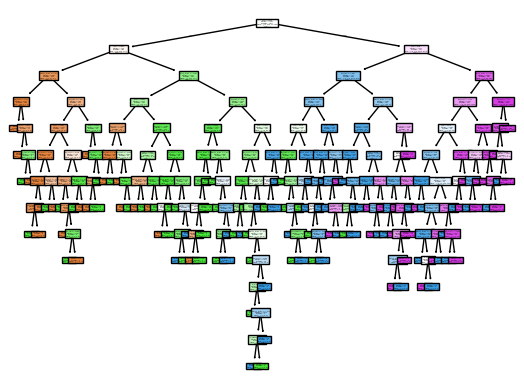

In [20]:
# 4. Applying Desicion Tree Model
from sklearn.tree import DecisionTreeClassifier
m4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, splitter = 'best') # applying and storing the model in variable 'm4'
m4.fit(x_train,y_train) # train the model with the training data
mscore(m4) # calling the function (calculate how good the model works)
ypred_m4 = m4.predict(x_test) # predicting with the test data
print('\npredicted price range for test data:\n',ypred_m4)
eval_model(y_test,ypred_m4) # calling the function to report the confusion matrix and the model's accuracy
fn = x.columns
cn = ['0','1','2','3']
from sklearn.tree import plot_tree
plot_tree(m4,feature_names = fn, class_names = cn, filled = True)
plt.show()

In [19]:
# 5. Applying Random Forest
from sklearn.ensemble import RandomForestClassifier
m5 = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', max_depth = 16) # applying and storing the model in variable 'm5'
m5.fit(x_train,y_train) # train the model with the training data
mscore(m5) # calling the function (calculate how good the model works)
ypred_m5 = m5.predict(x_test) # predicting with the test data
print('\npredicted price range for test data:\n',ypred_m5)
eval_model(y_test,ypred_m5)

Train Score 0.978
Test Score 0.794

predicted price range for test data:
 [3 0 2 2 3 0 0 2 3 1 0 3 0 2 3 0 3 2 2 1 0 0 3 1 2 2 3 1 3 1 0 0 2 0 2 3 0
 0 3 3 2 1 3 3 1 3 0 1 3 1 1 3 0 3 0 3 2 1 0 3 2 1 2 2 1 3 3 1 1 2 3 2 1 0
 1 3 2 2 2 2 3 3 3 0 0 0 2 0 2 3 1 2 1 1 0 3 2 3 0 3 1 1 3 1 3 2 2 2 3 3 2
 0 0 1 2 3 0 0 0 0 0 3 0 2 1 2 1 0 1 2 1 3 3 3 3 3 3 2 0 1 1 2 2 3 0 3 0 0
 2 0 1 1 1 1 3 1 0 3 1 3 2 1 3 1 2 3 3 3 1 0 3 2 2 2 3 0 2 2 3 0 2 1 0 2 2
 1 2 0 2 3 1 1 0 3 2 0 1 3 1 0 3 3 2 1 1 3 2 3 0 0 0 2 3 3 0 0 1 3 1 3 3 3
 0 0 2 2 3 2 0 2 0 0 1 3 3 0 2 2 2 1 1 2 3 3 0 0 1 3 3 2 3 0 3 1 0 0 1 3 2
 2 0 0 1 2 3 2 2 3 2 1 0 3 3 1 2 3 2 2 2 1 0 2 2 2 0 0 1 2 2 2 0 1 3 0 1 2
 2 0 2 0 1 1 3 0 0 2 3 1 1 1 2 0 3 0 3 3 2 3 1 1 2 1 1 2 0 1 0 3 1 1 3 1 0
 1 2 0 3 2 2 0 0 3 0 2 1 0 2 2 2 1 2 0 0 3 1 3 3 2 2 0 3 3 2 1 2 2 3 3 3 0
 2 0 3 0 1 1 2 3 2 2 1 2 0 1 2 3 0 0 1 3 0 3 0 1 2 1 0 0 3 0 0 1 3 0 3 3 0
 2 2 3 2 1 1 2 0 2 2 2 0 0 3 0 0 1 0 3 1 2 2 0 3 0 0 1 3 0 0 2 3 2 2 3 0 0
 2 2 0 2 0 3 3 0 2 3 0 3 2